In [2]:
import os 
import pandas as pd 
import sys 
import re 
import torch 
import numpy as np
import geopandas as gpd 
from shapely.geometry import Point
import folium 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path,'..','..','..','..'))  # '..','..','..'
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from pipeline.utils.utilities import load_saved_trials
from pipeline.Evaluation.STDA2.accuracy_comparison import get_model_args,get_desagregated_comparison_plot,get_full_predict_on_test_set
from experiences.common_results import find_baseline
from experiences.common_parameter import convertion_exp_name
from experiences.pipeline_desag.ML_desag_analysis.EventGainDatasetBuilder import EventGainDatasetBuilder
from pipeline.utils.calendar_class import is_bank_holidays, is_school_holidays
from pipeline.Evaluation.STDA2.accuracy_comparison import get_rainy_indices
from load_inputs.Exploratory_Data_Analysis.load_bike import load_dataset as load_bike_dataset
from load_inputs.Exploratory_Data_Analysis.load_bike import load_iris,load_bike_gdf
from load_inputs.Exploratory_Data_Analysis.utils import get_histogram_per_day_type,get_boxplot_per_spatial_unit_per_day_type,heatmap
from load_inputs.Exploratory_Data_Analysis.utils import IN_bdc,OUT_bdc,IN_nbdc,OUT_nbdc
from load_inputs.Exploratory_Data_Analysis.utils import filter_per_day_type, get_inflow_outflow
from load_inputs.Exploratory_Data_Analysis.load_subway import load_subway_gdf
from load_inputs.Exploratory_Data_Analysis.load_subway import load_dataset as load_subway_dataset
# ------------------------------------------
exp_i = 'pipeline_subway_out'
freq = '15min' #'15min'  
horizons = [4] # [4]  #[1,4]
model_name = 'STAEformer'
target_data = 'subway_out' #'bike_out'   #'subway_in' 
dataset_for_coverage = ['subway_out','subway_in']  # ['bike_out','subway_in_subway_out'] #['subway_in','subway_out','netmob_POIs']
contextual_dataset_names = ['subway_in'] # ['netmob_POIs'] #['subway_out']
TRIVIAL_TEST = False
REPEAT_TRIAL = 5 # 10
# ------------------------------------------

# Load trials:
trials = load_saved_trials(exp_i, model_name, target_data, contextual_dataset_names)

# Load full_predict1 and full_predict2: 
for h in horizons:
    exp_tmp = convertion_exp_name(target_data,contextual_dataset_names)
    baseline = find_baseline(exp_i,h=h,exp_tmp=exp_tmp,configs=trials)
    trial_ids2 = [f"{config}_bis" for config in trials if (config.endswith(f"_h{h}")) and not(baseline == config)]
    trial_ids1 = [f"{baseline}_bis"]*len(trial_ids2)
    save_folder_name = f'{exp_i}/{target_data}_{model_name}'
    save_folder_name_bis = None

    model_args,model_args_bis,path_model_args,path_model_args_bis = get_model_args(save_folder_name,save_folder_name_bis)


    for trial_id1,trial_id2 in zip(trial_ids1,trial_ids2):
        print(f"trial_id1: {trial_id1}")
        print(f"trial_id2: {trial_id2}")
        if trial_id2 == 'STAEformer_subway_out_subway_in_calendar_early_fusion_shared_embedding__e100_h4_bis':
            L_trainer1,L_trainer2,full_predict1,full_predict2,ds1,ds2,args_init1,args_init2,Y_true,X = get_full_predict_on_test_set(
                                                                                                        trial_id1=trial_id1,
                                                                                                        trial_id2=trial_id2,
                                                                                                        training_mode='test',
                                                                                                        range_k= range(1,REPEAT_TRIAL+1), 
                                                                                                        model_args=model_args,
                                                                                                        path_model_args=path_model_args,
                                                                                                        )
            break
        
        # outputs = get_desagregated_comparison_plot(
        #             trial_id1,
        #             trial_id2,
        #             model_args = model_args,
        #             model_args_bis = model_args_bis,
        #             path_model_args = path_model_args,
        #             path_model_args_bis = path_model_args_bis,
        #             range_k = range(1,REPEAT_TRIAL+1),
        #         )
        # clusterer,full_predict1,full_predict2,train_input,X,Y_true,L_trainers_1,L_trainers_2,ds1,ds2,args_init1,args_init2, dic_bd_metrics = outputs
    break
        
print("full_predict1.size():",full_predict1.size())
print("full_predict2.size():",full_predict2.size())



/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Training and Hyper-parameter tuning with Ray is not possible
Training and Hyper-parameter tuning with Ray is not possible
re._pattern:  STAEformer_subway_out_(?:subway_in|calendar).*?bis
trials found:  14
   STAEformer_subway_out_subway_in_calendar_early_fusion_shared_embedding__e100_h4
   STAEformer_subway_out_subway_in_calendar_early_fusion_BackBone_InEmb24_adp16__e100_h4
   STAEformer_subway_out_subway_in_calendar_early_fusion_s_proj_t_proj__e100_h1
   STAEformer_subway_out_subway_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1
   STAEformer_subway_out_calendar__e100_h4
   STAEformer_subway_out_subway_in_calendar_early_fusion_shared_embedding__e100_h1
   STAEformer_subway_out_subway_in_calendar_early_fusion_independant_embedding__e100_h1
   STAEformer_subway_out_subway_in_calendar_late_fusion_simple_embedding__e100_h4
   STAEformer_subway_out_subway_in_calendar_late_fusion_simple_embedding__e100_h1
   STAEformer_subway_out_subway_in_calendar_early_fusion_BackBone_InEmb24_adp

# Build Features: 

In [3]:
city = 'Lyon'
radius = 200
dates = ds2.tensor_limits_keeper.df_verif_test.iloc[:,-1] #ds2.df_dates['date']

is_2lane_subway = {
       'BEL': True, 
       'CHA': True, 
       'HOT':True,
       'SAX': True,
       }
is_link_to_tram ={'CHA':True, 
                  'PER':True,
                  'DEB':True,
                  'VEN':True,
                  'BEL':True,
                  'PAR':True,
                  'MER':True,
                  'BLA':True,
                  'GUI':True,
                  'SOI':True
                  } 
velov_capacity = {
} 

# --- Init spatial features dataframe:
spatial_features_df = pd.DataFrame(
{
    'station_id': ds2.spatial_unit,
    'is_2lane_subway': [int(is_2lane_subway[station]) if station in is_2lane_subway.keys() else 0 for station in ds2.spatial_unit],
    'is_link_to_tram': [int(is_link_to_tram[station]) if station in is_link_to_tram.keys() else 0 for station in ds2.spatial_unit],
    }
)
# ---


# Load Bike & Subway Datasets :  ( !!! SHOULD BE REStRICTED TO THE STUDY PERIOD)
for signal in ['in','out']:
    ds, df_raw, df =  load_bike_dataset(f"bike_{signal}",None,None)
    df_raw.columns.name = 'Spatial Unit ID'
    globals()[f'df_bike_raw_{signal}_no_agg'] = df_raw
    # globals()[f'ds_{signal}_no_agg'] = ds
    # globals()[f'df_bike_{signal}_no_agg'] = df

for signal in ['in','out']: # ['in','out']:
    ds, df_raw, df =  load_subway_dataset(f"subway_{signal}")
    df_raw.columns.name = 'Spatial Unit ID'
    globals()[f'df_subway_raw_{signal}'] = df_raw
    # globals()[f'ds_{signal}'] = ds
    # globals()[f'df_subway_{signal}'] = df

# --- For each period and each day type: 
for period in ['all_day','evening_peak','morning_peak','off_peak']:
    for day_type in ['business_day','non_business_day']:
        # Tackle bike: 
        inflow_bike, outflow_bike = get_inflow_outflow(df_bike_raw_in_no_agg,df_bike_raw_out_no_agg,city = city,period = period,day_type = day_type,index_name = 'idstation')
        gdf_velov = load_bike_gdf(inflow_bike,outflow_bike)

        # Tackle subway:
        index_name = 'COD_STA'
        folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots"
        save_path = f'{folder}/subway_{period}_{day_type}.html'# None 
        filter_q = 0.99
        inflow_subway, outflow_subway = get_inflow_outflow(df_subway_raw_in,df_subway_raw_out,filter_q= filter_q,city=city,period = period,day_type = day_type,index_name = index_name)
        df_subway = pd.read_csv('../../../../../../data/rrochas/raw_data/keolis_data_2019-2020/ref_subway.csv',index_col =0)
        df_subway.loc[:,'geometry'] = df_subway.apply(lambda row: Point(row['MEAN_X'],row['MEAN_Y']), axis=1)
        gdf_subway_stations = gpd.GeoDataFrame(df_subway, geometry='geometry', crs='EPSG:4326')

        # --- Get subway-Inflow and subway Outflow for each station:
        merged_subway =  gdf_subway_stations.copy()
        merged_subway = pd.merge(merged_subway,pd.DataFrame(inflow_subway).reset_index().rename(columns= {'COD_STA':'COD_TRG'}),on='COD_TRG',how='left')
        merged_subway = pd.merge(merged_subway,pd.DataFrame(outflow_subway).reset_index().rename(columns= {'COD_STA':'COD_TRG'}),on='COD_TRG',how='left')


        # --- Get buffer of bike stations and associated informations: 
        subway_buffers = gdf_subway_stations.copy().to_crs(epsg=2154)
        subway_buffers.geometry = subway_buffers.geometry.buffer(radius)

        gdf_velov_copy = gdf_velov.rename(columns= {'Inflow':'Inflow_velov','Outflow':'Outflow_velov'})
        gdf_velov_copy = gdf_velov_copy.to_crs(epsg=2154)
        joined = gpd.sjoin(subway_buffers, gdf_velov_copy, how='left', predicate='intersects')

        agg_dict = {
            'Inflow_velov': 'sum',
            'Outflow_velov': 'sum', # Keeping your typo to match your dataframe
            'nbbornettes': 'sum',
            'idstation': lambda x: ' '.join(list(set(x.dropna().astype(str))))
        }
        # Group by the index of the subway stations and aggregate
        aggregated = joined.groupby(joined.index).agg(agg_dict)

        # Map the aggregated columns back to the original subway GeoDataFrame
        
        merged_subway['Inflow_velov'] = aggregated['Inflow_velov'].fillna(0)
        merged_subway['Outflow_velov'] = aggregated['Outflow_velov'].fillna(0)
        merged_subway['bike_nbbornettes'] = aggregated['nbbornettes'].fillna(0)
        merged_subway['bike_idstation'] = aggregated['idstation'].replace('', pd.NA).fillna('')

        merged_subway_copy = merged_subway.copy()
        merged_subway_copy = merged_subway_copy.rename(columns= {'COD_TRG':'station_id'})[['station_id','Inflow_velov','Outflow_velov','Inflow','Outflow']]

        spatial_features_df = pd.merge(spatial_features_df,merged_subway_copy,on='station_id',how='left')

        spatial_features_df.rename(columns= {'Inflow':f"{period}_{day_type}_in_subway",
                                            'Outflow':f"{period}_{day_type}_out_subway",
                                            'Outflow_velov':f"{period}_{day_type}_out_bike",
                                            'Inflow_velov':f"{period}_{day_type}_in_bike",
                                            }
                                            ,inplace=True)

display(spatial_features_df.head(3))

Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_attracted_by_station15min.csv...
df pivoted:  (70094, 435)
df reindexed :  (35040, 435)
Len coverage period:  35040
df filtered:  (35040, 435)
   Loaded data: (35040, 435)
Values with issues:  18.161%
Regular Values that we have to set to 0:  0.000%
Values with issues:  18.161%
Regular Values that we have to set to 0:  0.660%
Values with issues:  18.161%
Regular Values that we have to set to 0:  1.079%
Values with issues:  18.161%
Regular Values that we have to set to 0:  0.000%
Values with issues:  18.161%
Regular Values that we have to set to 0:  0.662%
Values with issues:  18.161%
Regular Values that we have to set to 0:  1.079%
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_emitted_by_station15min.csv...
df pivoted:  (70049, 434)
df reindexed :  (35040, 434)
Len coverage period:  35040
df filtered:  (35040, 434)
   Loaded data: (35040, 434)
Values with 

ERROR 1: PROJ: proj_create_from_database: Open of /root/anaconda3/envs/pytorch-2.0.1/share/proj failed


Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944
Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944
Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944
Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944
Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944
Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944
Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254
Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254
Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254
Number of remaining time-slots after filtering 2761


,station_id,is_2lane_subway,is_link_to_tram,all_day_business_day_in_bike,all_day_business_day_out_bike,all_day_business_day_in_subway,all_day_business_day_out_subway,all_day_non_business_day_in_bike,all_day_non_business_day_out_bike,all_day_non_business_day_in_subway,...,morning_peak_non_business_day_in_subway,morning_peak_non_business_day_out_subway,off_peak_business_day_in_bike,off_peak_business_day_out_bike,off_peak_business_day_in_subway,off_peak_business_day_out_subway,off_peak_non_business_day_in_bike,off_peak_non_business_day_out_bike,off_peak_non_business_day_in_subway,off_peak_non_business_day_out_subway
0,AMP,0,0,21727.0,21525.0,1.439991e+06,1163232.500,6588.0,6733.0,3.373290e+05,...,24742.0,27478.000,12681.0,12265.0,8.016560e+05,635912.50,4705.0,4845.0,2.273650e+05,179845.000
1,BEL,1,1,105728.0,99481.0,8.137648e+06,4404668.325,36213.0,35830.0,2.365566e+06,...,105293.0,113910.805,61513.0,61181.0,4.793536e+06,2492424.53,25384.0,25979.0,1.611737e+06,930952.455
2,BRO,0,0,76166.0,75919.0,1.303800e+06,1282885.000,21254.0,21239.0,2.370520e+05,...,22196.0,23620.000,40659.0,41365.0,5.921525e+05,574940.00,15738.0,16290.0,1.591090e+05,169884.000


In [4]:
# --- Visualise Data: 
subway_buffer_union = gdf_subway_stations.copy().to_crs(epsg=2154).geometry.buffer(radius).unary_union
velov_within_200m = gdf_velov[gdf_velov.copy().to_crs(epsg=2154).geometry.intersects(subway_buffer_union)]
m = gdf_subway_stations.explore(
                name = 'Subway Inflow',
                tiles = 'cartodbpositron',
                style_kwds={'color': 'black', 'fillColor': 'red', 'fillOpacity': 0.7, 'radius': 8},
                )
m = gdf_velov.explore(m= m, name= 'Bike Outflow', columns = 'Inflow',
                      style_kwds={'color': 'blue', 'fillColor': 'lightblue', 'fillOpacity': 0.7, 'radius': 1},)
m = velov_within_200m.explore(m= m, name= f'Bike < raidus {radius} Outflow',
                               style_kwds={'color': 'black', 'fillColor': 'green', 'fillOpacity': 0.7, 'radius': 4},
                               )

folium.LayerControl().add_to(m)
m
# ---

In [5]:
# --- Visualize data: ---
m  = merged_subway.explore('Inflow_velov', 
                    tiles = 'cartodbpositron',
                    name = 'Inflow_velov',
                    style_kwds = {"style_function": lambda x: {
                        "radius": 20*(x["properties"]["Inflow_velov"]/merged_subway.Inflow_velov.max()),
                         'fillOpacity':0.5
                         },
                    }
                    )

m = merged_subway.copy().explore(
                        m = m,
                          column = 'Outflow_velov',
                          name = 'Outflow_velov',
                        #  tiles = 'cartodbpositron',
                        style_kwds = {"style_function": lambda x: {
                                    "radius": 20*(x["properties"]["Inflow_velov"]/merged_subway.Outflow_velov.max()),
                                    'fillOpacity':0.5
                                    },
                        }
                    )
folium.LayerControl().add_to(m)

m

In [6]:
# --- Load Weather DataFrame: 
_,_,raw_df_weather,_ = get_rainy_indices(args = args_init2,ds = ds2,training_mode = 'test')
s_weather = raw_df_weather.mean(axis = 1).loc[dates]
s_weather.name = 'rainfall_intensity'
weather_df = pd.DataFrame(s_weather)
weather_df.index.name = 'datetime'
display(weather_df.head(2))



# --- Load Calendar DataFrame: 
def build_calendar_df(dates):
    calendar_df = pd.DataFrame({
        'datetime': dates,
    })
    calendar_df['weekday'] = calendar_df.datetime.dt.weekday < 5
    calendar_df['bank_holidays'] = calendar_df.datetime.apply(lambda x: is_bank_holidays(x,city=ds2.city))
    calendar_df['business_day'] = calendar_df['weekday'] & (~calendar_df['bank_holidays'])
    school_holidays,remaining_holidays  = zip(*calendar_df['datetime'].apply(lambda x : is_school_holidays(x,city=ds2.city)))
    calendar_df['school_holidays'] = school_holidays
    calendar_df.drop(columns=['weekday'], inplace=True)
    calendar_df = calendar_df.set_index('datetime')
    return calendar_df

calendar_df = build_calendar_df(dates)
print('size of calendar_df:', calendar_df.shape)
display(calendar_df.sum())

# --- Instanciation de la classe
builder = EventGainDatasetBuilder(
    full_predict1=full_predict1,
    full_predict2=full_predict2,
    Y_true=Y_true,
    ds=ds2,
    dates=dates,
    spatial_features_df=spatial_features_df,
    weather_df=weather_df,
    calendar_df=calendar_df
)

# Extraction du dataset
min_flow=20
min_err = 10
events_df = builder.get_dataset(metric='mae', target_horizon_idx=0,min_flow=min_flow ,min_err=min_err)

# Vérification des résultats
print(f"Dimension du dataset final : {events_df.shape}")
display(events_df.head(2))

cloned_demand = np.where(events_df['demand'] < min_flow, min_flow, events_df['demand'])
events_df['norm_err1'] = events_df['error_mod1'] / cloned_demand
events_df['norm_err2'] = events_df['error_mod2'] / cloned_demand

,rainfall_intensity
datetime,
2019-10-20 17:45:00,4.613658
2019-10-20 18:00:00,5.950000


size of calendar_df: (4987, 3)


bank_holidays       216
business_day       3397
school_holidays    1603
dtype: int64

Dimension du dataset final : (180932, 47)


,datetime,station_id,demand,error_mod1,error_mod2,gain,weekday,hour,minute,rainfall_intensity,...,morning_peak_non_business_day_in_subway,morning_peak_non_business_day_out_subway,off_peak_business_day_in_bike,off_peak_business_day_out_bike,off_peak_business_day_in_subway,off_peak_business_day_out_subway,off_peak_non_business_day_in_bike,off_peak_non_business_day_out_bike,off_peak_non_business_day_in_subway,off_peak_non_business_day_out_subway
0,2019-10-20 17:45:00,AMP,21.0,13.030729,11.226407,13.846671,6,17,45,4.613658,...,24742.0,27478.000,12681.0,12265.0,8.016560e+05,635912.50,4705.0,4845.0,2.273650e+05,179845.000
1,2019-10-20 17:45:00,BEL,176.5,3.792685,4.610587,-8.179016,6,17,45,4.613658,...,105293.0,113910.805,61513.0,61181.0,4.793536e+06,2492424.53,25384.0,25979.0,1.611737e+06,930952.455


## Add feature related to signature demand: 

In [7]:
def get_signature_values(df,dates,column_to_group):
    calendar_df = build_calendar_df(dates)

    stacked_df_train = df.stack()
    stacked_df_train.name = 'Flow'
    stacked_df_train = stacked_df_train.reset_index()
    stacked_df_train = stacked_df_train.rename(columns = {'COD_STA':'station_id', 'Station':'station_id'})
    stacked_df_train['hour'] = stacked_df_train['datetime'].dt.hour
    stacked_df_train['weekday'] = stacked_df_train['datetime'].dt.weekday
    stacked_df_train['minute'] = stacked_df_train['datetime'].dt.minute

    merged_df_train = pd.merge(stacked_df_train,calendar_df.reset_index(),on='datetime',how='left').drop(columns=['datetime','bank_holidays'])
    grouped_df_train = merged_df_train.groupby(column_to_group).mean().reset_index()
    return grouped_df_train

min_err = 10
is_rainy_threshold = 0.1
epsilon_log_ratio = 1 

column_to_group = ['station_id','weekday','hour','minute','business_day','school_holidays']#,'is_rainy']
df_copy = events_df.copy()


# --- Target Data: (Subway Out)
train_dates = ds.tensor_limits_keeper.df_verif_train.iloc[:,-1]
train_dates.name = 'datetime'
df_subway_out = pd.DataFrame(ds.Utarget_train.squeeze(), columns = ds2.spatial_unit, index = train_dates)
grouped_df_Out = get_signature_values(df_subway_out,train_dates,column_to_group)

# --- Contextual Data: (Subway In) 
trainer2 = L_trainer2[0]
X,Y,X_c,nb_contextual = trainer2.load_all_inputs_from_training_mode(training_mode = 'train')
Xc_subway_in = X_c[2][:,:,-1].detach().cpu().numpy()
dates_subway_in = ds2.tensor_limits_keeper.df_verif_train.loc[:,"t-1"]
dates_subway_in.name = 'datetime'
df_subway_in = pd.DataFrame(Xc_subway_in, columns = ds2.spatial_unit, index = dates_subway_in)
grouped_df_In = get_signature_values(df_subway_in,dates_subway_in,column_to_group)

In [8]:
df_copy['is_rainy'] = df_copy['rainfall_intensity'] > is_rainy_threshold


grouped_df = df_copy.groupby(column_to_group).mean()
counted = df_copy.groupby(column_to_group).count()

cloned_err1 = np.where(grouped_df['error_mod1'] < min_err, min_err, grouped_df['error_mod1'])
clonded_err1 = pd.Series(cloned_err1, index=grouped_df.index)
grouped_df['gain'] = 100 * (grouped_df['error_mod1'] - grouped_df['error_mod2']) / cloned_err1

grouped_df['log_ratio'] = np.log((grouped_df['error_mod2']+ epsilon_log_ratio) / (grouped_df['error_mod1']+ epsilon_log_ratio))
grouped_df['diff_err'] = grouped_df['error_mod2'] - grouped_df['error_mod1']
grouped_df['normed_diff_err'] = (grouped_df['norm_err2'] - grouped_df['norm_err1'])
grouped_df['count'] = counted.iloc[:,-1]
grouped_df = grouped_df[grouped_df['count'] > 1].drop(columns = ['bank_holidays']).reset_index()  # filter when only one value
display(grouped_df.head(2))

# Add Flow Target: 
grouped_df = grouped_df.merge(grouped_df_Out[column_to_group+['Flow']], on=column_to_group,how='left')
grouped_df = grouped_df.rename(columns = {'Flow':'Signature_Outflow'})


grouped_df = grouped_df.merge(grouped_df_In[column_to_group+['Flow']], on=column_to_group,how='left')
grouped_df = grouped_df.rename(columns = {'Flow':'Signature_Inflow'})


df_to_plot_copy = events_df.drop(columns=['error_mod1','error_mod2','gain','norm_err1','norm_err2']).copy()
df_to_plot_copy['is_rainy'] = df_to_plot_copy['rainfall_intensity'] > is_rainy_threshold
df_to_plot_copy = df_to_plot_copy.merge(grouped_df[column_to_group+['gain','log_ratio','error_mod1','error_mod2','diff_err','normed_diff_err','Signature_Outflow', 'Signature_Inflow','norm_err1','norm_err2']], on = column_to_group, how = 'left')

,station_id,weekday,hour,minute,business_day,school_holidays,datetime,demand,error_mod1,error_mod2,...,off_peak_non_business_day_out_bike,off_peak_non_business_day_in_subway,off_peak_non_business_day_out_subway,norm_err1,norm_err2,is_rainy,log_ratio,diff_err,normed_diff_err,count
0,AMP,0,7,0,True,False,2019-12-09 07:00:00,23.5,5.264649,3.325386,...,4845.0,227365.0,179845.0,0.227367,0.143070,0.0,-0.370421,-1.939263,-0.084297,2
1,AMP,0,7,15,True,False,2019-11-14 19:15:00,24.0,8.992565,3.843088,...,4845.0,227365.0,179845.0,0.374690,0.160129,0.0,-0.724289,-5.149477,-0.214561,2


In [9]:
from pipeline.plotting.TS_analysis import plot_TS

plot_TS(df_to_plot_copy[df_to_plot_copy['station_id']=='BEL'].sort_values(by='datetime').set_index('datetime')[['gain','log_ratio','diff_err','error_mod1','error_mod2','demand','normed_diff_err','Signature_Outflow', 'Signature_Inflow','norm_err1','norm_err2']],bool_show = True,width = 800)

plot_TS(events_df[events_df['station_id']=='BEL'].sort_values(by='datetime').set_index('datetime')[['gain','error_mod1','error_mod2','demand']],bool_show = True,width = 800)

Loading BokehJS ...

Loading BokehJS ...

figure(id='p1180', ...)

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

try:
    import ray
    from ray import tune
    from ray.tune.search.hyperopt import HyperOptSearch
    from ray.tune.schedulers import ASHAScheduler
    from ray.tune.integration.xgboost import TuneReportCallback
except: 
    print("Tuning impossible")

class ContextualGainExplainer:
    def __init__(self, events_df, target_col='gain', test_size=0.2, seed=42, cyclic_time = False):
        self.data = events_df.copy()
        self.target_col = target_col
        self.model = None
        self.shap_values = None
        self.explainer = None
        self.X_train, self.X_test = None, None
        self.y_train, self.y_test = None, None
        self.X_sample = None
        self.evals_result = {}
        self.test_size = test_size
        self.seed = seed
        self.cyclic_time = cyclic_time

    def preprocess_data(self):
        drop_cols = ['datetime',self.target_col]
        if (self.cyclic_time) and ('datetime' in self.data.columns):
            dt = pd.to_datetime(self.data['datetime'])
            self.data['hour_sin'] = np.sin(2 * np.pi * dt.dt.hour / 24)
            self.data['hour_cos'] = np.cos(2 * np.pi * dt.dt.hour / 24)
            self.data['minute_sin'] = np.sin(2 * np.pi * dt.dt.minute / 60)
            self.data['minute_cos'] = np.cos(2 * np.pi * dt.dt.minute / 60)


            drop_cols = drop_cols + ['hour','minute']

        X = self.data.drop(columns=[c for c in drop_cols if c in self.data.columns]).copy()
        y = self.data[self.target_col].copy()

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.seed
        )
        print(f"Train set size: {self.X_train.shape[0]} samples, Test set size: {self.X_test.shape[0]} samples")
        print('X: \n',X.head(5))
        print('y: \n',y.head(5))

    def load_model(self,n_estimators,max_depth,lr):
        self.model = xgb.XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=lr,
            enable_categorical=True,
            tree_method="hist",
            n_jobs=-1,
            early_stopping_rounds=50,
            random_state=42
        )

    def train_model(self, n_estimators=None, max_depth=None, lr=None):

        if not self.model:
            self.load_model(n_estimators, max_depth, lr)

        
        self.model.fit(
            self.X_train, self.y_train,
            eval_set=[(self.X_train, self.y_train), (self.X_test, self.y_test)],
            verbose=False
        )
        
        self.evals_result = self.model.evals_result()
        
        preds = self.model.predict(self.X_test)
        r2 = r2_score(self.y_test, preds)
        print(f"Entraînement terminé. R2 final sur le test set : {r2:.4f}")

    def plot_learning_curve(self):
        if not self.evals_result:
            raise ValueError("Exécutez train_model() en premier.")
            
        epochs = len(self.evals_result['validation_0']['rmse'])
        x_axis = range(0, epochs)
        
        plt.figure(figsize=(8, 5))
        plt.plot(x_axis, self.evals_result['validation_0']['rmse'], label='Train RMSE')
        plt.plot(x_axis, self.evals_result['validation_1']['rmse'], label='Test RMSE')
        plt.legend()
        plt.ylabel('RMSE')
        plt.xlabel('Itérations')
        plt.title('Convergence XGBoost')
        plt.show()

    def tune_grid_search(self):
        param_grid = {
            'max_depth': [3,4,6,8],
            'learning_rate': [0.005, 0.01, 0.03, 0.05, 0.1],
            'n_estimators': [3000]
        }
        model = xgb.XGBRegressor(enable_categorical=True, tree_method="hist", random_state=42)
        grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3, verbose=1, n_jobs=-1)
        grid.fit(self.X_train, self.y_train)
        print(f"Meilleurs paramètres GridSearch : {grid.best_params_}")
        self.model = grid.best_estimator_

    # def tune_ray(self, num_samples=20):
    #     X_tr, y_tr = self.X_train, self.y_train
    #     X_te, y_te = self.X_test, self.y_test

    #     def trainable(config):
    #         model = xgb.XGBRegressor(
    #             n_estimators=1000,
    #             max_depth=config["max_depth"],
    #             learning_rate=config["learning_rate"],
    #             enable_categorical=True,
    #             tree_method="hist",
    #             n_jobs=1, # Limiter à 1 thread par trial pour éviter la contention CPU
    #             random_state=42
    #         )
            
    #         # Obligatoire pour ASHA afin d'exposer les métriques à chaque itération
    #         callback = TuneReportCallback({"rmse": "validation_1-rmse"})
            
    #         model.fit(
    #             X_tr, y_tr,
    #             eval_set=[(X_tr, y_tr), (X_te, y_te)],
    #             callbacks=[callback],
    #             verbose=False
    #         )

    #     search_space = {
    #         "max_depth": tune.randint(3, 10),
    #         "learning_rate": tune.loguniform(1e-3, 0.5)
    #     }

    #     algo = HyperOptSearch()
    #     scheduler = ASHAScheduler(
    #         time_attr="training_iteration",
    #         metric="rmse",
    #         mode="min",
    #         max_t=1000,
    #         grace_period=10,
    #         reduction_factor=3
    #     )

    #     tuner = tune.Tuner(
    #         trainable,
    #         tune_config=tune.TuneConfig(
    #             metric="rmse",
    #             mode="min",
    #             search_alg=algo,
    #             scheduler=scheduler,
    #             num_samples=num_samples,
    #         ),
    #         param_space=search_space,
    #     )
        
    #     results = tuner.fit()
    #     print("Meilleurs hyperparamètres Ray Tune :", results.get_best_result().config)

    def compute_shap(self, sample_size=10000):
        self.data['gain_bins'] = pd.qcut(self.data[self.target_col], q=10, duplicates='drop')
        sample_indices = self.data.groupby('gain_bins', group_keys=False).apply(
            lambda x: x.sample(n=min(len(x), sample_size // 10), random_state=42)
        ).index
        
        self.X_sample = self.X_train.loc[self.X_train.index.intersection(sample_indices)]
        self.explainer = shap.TreeExplainer(self.model)
        self.shap_values = self.explainer(self.X_sample)

    def plot_global_importance(self, max_display=10):
        plt.figure()
        shap.plots.bar(self.shap_values, max_display=max_display)
        plt.show()

    def plot_explanations(self):
        plt.figure()
        shap.plots.beeswarm(self.shap_values, max_display=20)
        X_sample_encoded = self.X_sample.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)
        interaction_values = self.explainer.shap_interaction_values(X_sample_encoded)
        # interaction_values = self.explainer.shap_interaction_values(self.X_sample)
        shap.summary_plot(interaction_values, self.X_sample, max_display=10)

        if 'rainfall_intensity' in self.X_sample.columns:
            shap.dependence_plot('rainfall_intensity', self.shap_values.values, self.X_sample)
            
def encode_column_types(df: pd.DataFrame, dtype_mapping: dict) -> pd.DataFrame:

    df_out = df.copy()
    for col, target_dtype in dtype_mapping.items():
        if col in df_out.columns:
            df_out[col] = df_out[col].astype(target_dtype)
            
    return df_out

Tuning impossible


,diff_err,datetime,station_id,Signature_Outflow,Signature_Inflow,weekday,hour,minute,rainfall_intensity,school_holidays
0,-1.939263,2019-12-09 07:00:00,AMP,0.047047,0.149038,0,7,0,0.000000,False
1,-5.149477,2019-11-14 19:15:00,AMP,0.041017,0.225202,0,7,15,0.000000,False
2,-1.964665,2019-11-27 15:30:00,AMP,0.056041,0.366397,0,7,30,0.002505,False
3,-1.144018,2019-11-27 15:45:00,AMP,0.094874,0.620951,0,7,45,0.008313,False
4,-7.211254,2019-11-21 19:45:00,AMP,0.051310,0.276175,0,7,45,0.032698,True


Train set size: 29962 samples, Test set size: 7491 samples
X: 
   station_id  Signature_Outflow  Signature_Inflow weekday  hour  minute  \
0        AMP           0.047047          0.149038       0     7       0   
1        AMP           0.041017          0.225202       0     7      15   
2        AMP           0.056041          0.366397       0     7      30   
3        AMP           0.094874          0.620951       0     7      45   
4        AMP           0.051310          0.276175       0     7      45   

   rainfall_intensity school_holidays  
0            0.000000           False  
1            0.000000           False  
2            0.002505           False  
3            0.008313           False  
4            0.032698            True  
y: 
 0   -1.939263
1   -5.149477
2   -1.964665
3   -1.144018
4   -7.211254
Name: diff_err, dtype: float32
Entraînement terminé. R2 final sur le test set : 0.3564


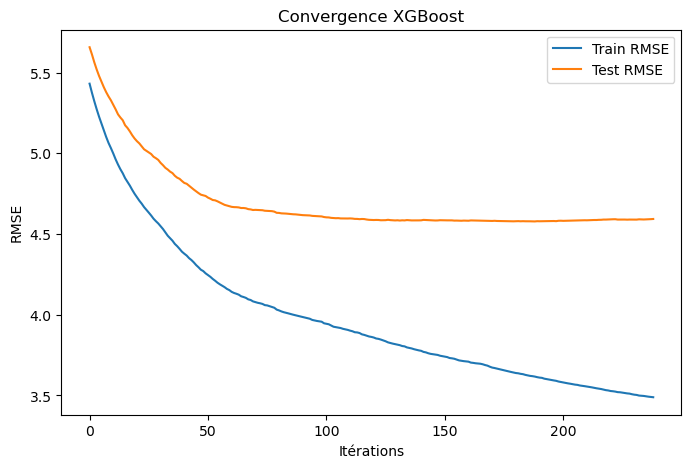

In [11]:

target_col = 'diff_err' # 'log_ratio' # 'gain' # 'normed_diff_err' # 'diff_err'
dtype_mapping = {
    'station_id': 'category',
    'is_2lane_subway': 'category',
    'is_link_to_tram': 'category',
    'bank_holidays': 'category',
    'business_day': 'category',
    'school_holidays': 'category',
    'weekday': 'category',
#     'hour': 'category',
#     'minute': 'category',
}

row_to_drop = ['error_mod1', 'error_mod2','is_rainy']
# events_df_copy = events_df.drop(columns=row_to_drop).copy()
events_df_copy = grouped_df.drop(columns=row_to_drop).copy()

# 1. Keep only a subset of columns: 
if True: 
       row_to_keep = [ target_col, 'datetime', 'station_id', 
                     #  'demand', 
                      'Signature_Outflow',
                      'Signature_Inflow',
              'weekday', 'hour', 'minute', 'rainfall_intensity', 'school_holidays']
              # 'business_day', 'is_2lane_subway', 'is_link_to_tram']
       events_df_copy = events_df_copy[row_to_keep].copy()

if False: 
       events_df_copy['time'] = events_df_copy['datetime'].dt.time
       events_df_copy = events_df_copy.drop(columns = ['hour','minute'])
       dtype_mapping.update({
              'time':'category',
       })

# 2. Keep only a subset of moment of the day: 
if False: 
       events_df_copy = events_df_copy[((events_df_copy.hour > 6)  & (events_df_copy.hour < 11)) | ((events_df_copy.hour > 15)  & (events_df_copy.hour < 20))]
       
events_df_copy = encode_column_types(events_df_copy, dtype_mapping)

display(events_df_copy.head())
# Initialize the explainer
explainer = ContextualGainExplainer(events_df_copy, target_col=target_col,cyclic_time = False)

# Execute preprocessing (feature engineering and data splitting)
explainer.preprocess_data()

# Train the model using early stopping to handle the 176k samples
if True:
       explainer.train_model(n_estimators=3000, max_depth = 6, lr=0.05)
else:
       explainer.tune_grid_search()
       explainer.train_model()

explainer.plot_learning_curve()

/tmp/ipykernel_243592/2155830823.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_indices = self.data.groupby('gain_bins', group_keys=False).apply(
/tmp/ipykernel_243592/2155830823.py:170: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_indices = self.data.groupby('gain_bins', group_keys=False).apply(


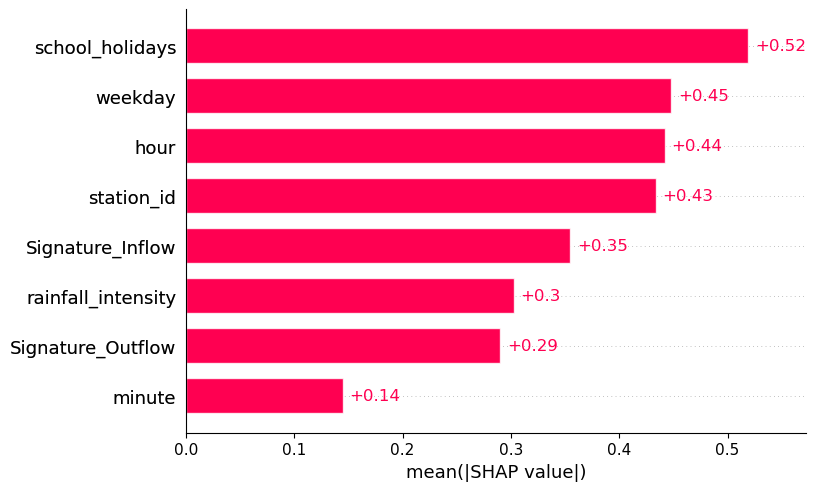

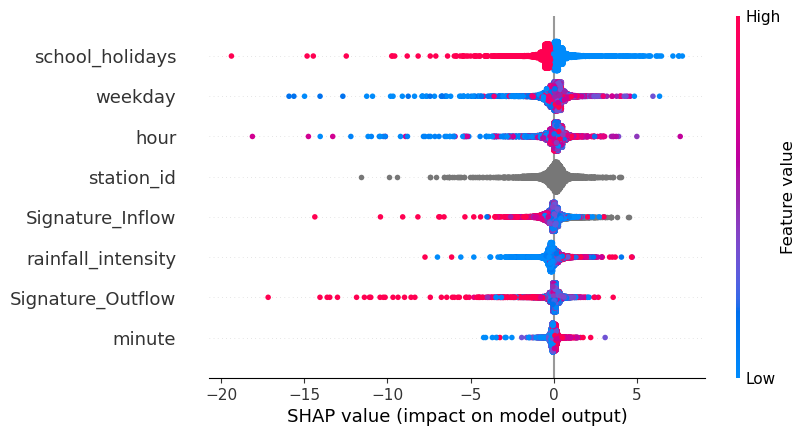

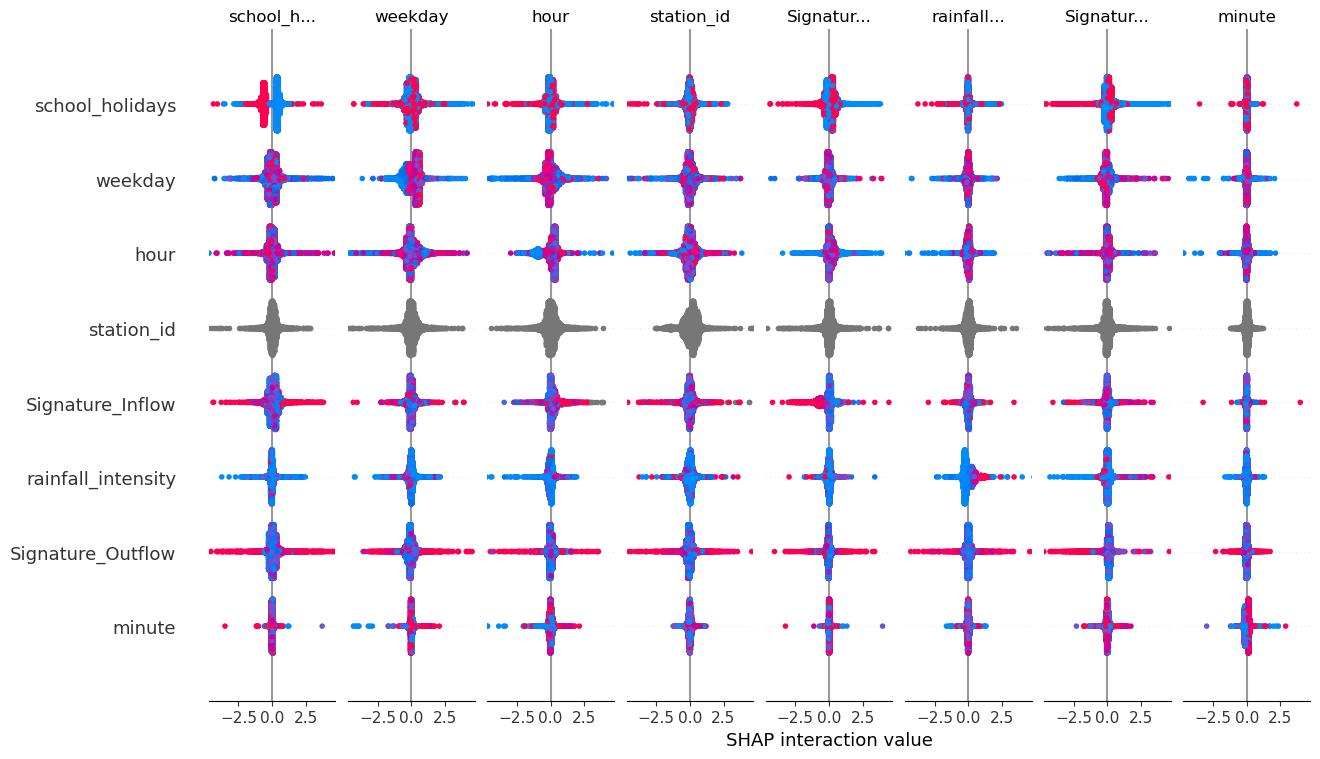

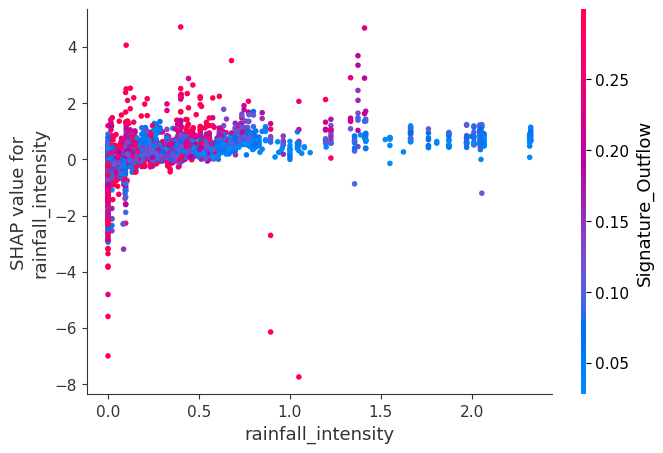

In [12]:
# Compute SHAP values on a stratified sample of 10,000 observations
explainer.compute_shap(sample_size=10000)

explainer.plot_global_importance(max_display=10)
# Generate the analytical plots
explainer.plot_explanations()